In [1]:
# import tools
import pandas as pd
%matplotlib inline
import qiime2
from qiime2 import Artifact
from tempfile import mkdtemp
from qiime2.plugins import demux, deblur, quality_filter, \
                           metadata, feature_table, alignment, \
                           phylogeny, diversity, emperor, feature_classifier, \
                           taxa, composition
from qiime2.plugins import fragment_insertion
from qiime2.plugins.fragment_insertion.methods import filter_features
from qiime2.plugins.feature_table.methods import filter_samples
from qiime2.plugins.feature_table.visualizers import summarize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab
from scipy.optimize import curve_fit

## Set path

In [2]:
cd "UCSD/00_Knight_Lab/03_Extraction_test_12201/round_03_2vs20min/01_16S/data/"

/Users/Justin/Google-Drive-UCSD/UCSD/00_Knight_Lab/03_Extraction_test_12201/round_03_2vs20min/01_16S/data


## Filter feature-table to generate per-extraction plate tables

In [ ]:
extraction_test_round_3_biom.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom.qza \
  --o-visualization extraction_test_round_3_biom.qzv



In [ ]:
# 2-min MagMAX - high biomass
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'microbiome' AND bead_beating = '2 min. at 30 Hz' AND biomass_plate = 'high'" \
  --o-filtered-table extraction_test_round_3_biom_2min_high.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_2min_high.qza \
  --o-visualization extraction_test_round_3_biom_2min_high.qzv


# 2-min MagMAX - low biomass
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'microbiome' AND bead_beating = '2 min. at 30 Hz' AND biomass_plate = 'low'" \
  --o-filtered-table extraction_test_round_3_biom_2min_low.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_2min_low.qza \
  --o-visualization extraction_test_round_3_biom_2min_low.qzv


# 2-min MagMAX - COVID-19 type
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'microbiome' AND bead_beating = '2 min. at 30 Hz' AND biomass_plate = 'COVID-19'" \
  --o-filtered-table extraction_test_round_3_biom_2min_covid.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_2min_covid.qza \
  --o-visualization extraction_test_round_3_biom_2min_covid.qzv



# 20-min MagMAX - high biomass
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'microbiome' AND bead_beating = '20 min. at 30 Hz' AND biomass_plate = 'high'" \
  --o-filtered-table extraction_test_round_3_biom_20min_high.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_20min_high.qza \
  --o-visualization extraction_test_round_3_biom_20min_high.qzv


# 20-min MagMAX - low biomass
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'microbiome' AND bead_beating = '20 min. at 30 Hz' AND biomass_plate = 'low'" \
  --o-filtered-table extraction_test_round_3_biom_20min_low.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_20min_low.qza \
  --o-visualization extraction_test_round_3_biom_20min_low.qzv


# 20-min MagMAX - COVID-19 type
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'microbiome' AND bead_beating = '20 min. at 30 Hz' AND biomass_plate = 'COVID-19'" \
  --o-filtered-table extraction_test_round_3_biom_20min_covid.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_20min_covid.qza \
  --o-visualization extraction_test_round_3_biom_20min_covid.qzv


# Qiagen - high biomass
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'standard' AND biomass_plate = 'high'" \
  --o-filtered-table extraction_test_round_3_biom_qiagen_high.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_qiagen_high.qza \
  --o-visualization extraction_test_round_3_biom_qiagen_high.qzv


# Qiagen - low biomass
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'standard' AND biomass_plate = 'low'" \
  --o-filtered-table extraction_test_round_3_biom_qiagen_low.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_qiagen_low.qza \
  --o-visualization extraction_test_round_3_biom_qiagen_low.qzv


# Qiagen - high biomass
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom.qza \
  --m-metadata-file extraction_test_round_3_metadata.txt  \
  --p-where "extraction_kit_id = 'standard' AND biomass_plate = 'COVID-19'" \
  --o-filtered-table extraction_test_round_3_biom_qiagen_covid.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_qiagen_covid.qza \
  --o-visualization extraction_test_round_3_biom_qiagen_covid.qzv


## Import data

In [3]:
# import raw feature table and taxonomy
table_magmax2_highbiomass = Artifact.load('extraction_test_round_3_biom_2min_high.qza')
table_magmax2_lowbiomass = Artifact.load('extraction_test_round_3_biom_2min_low.qza')

table_magmax20_highbiomass = Artifact.load('extraction_test_round_3_biom_20min_high.qza')
table_magmax20_lowbiomass = Artifact.load('extraction_test_round_3_biom_20min_low.qza')

table_qiagen_highbiomass = Artifact.load('extraction_test_round_3_biom_qiagen_high.qza')
table_qiagen_lowbiomass = Artifact.load('extraction_test_round_3_biom_qiagen_low.qza')

taxonomy = Artifact.load('extraction_test_round_3_taxonomy.qza')

## Collapse and subset data
### NOTE: Set 'table' to one of the tables above

In [83]:
table = table_qiagen_lowbiomass

In [84]:
# collapsed table to genus level
t6 = taxa.methods.collapse(table = table,
                           taxonomy = taxonomy,
                           level = 6)
# import collapsed table as pandas dataframe
df = t6.collapsed_table.view(pd.DataFrame)
# subset out Zymo mock community samples
zymo = df[df.index.str.contains('bacsu|para')]
# ensure table values are numeric
zymo = zymo.astype(float)

In [85]:
# quick visual check that top 7 taxa make up most of the reads in highest input sample ("d1")
max_input = zymo[zymo.index.str.contains("d1")]
zymoT = max_input.T
zymoT.sort_values(zymoT.columns[0], ascending = False).head(10)

,91743.12201.para.d1.1.qiagen.L,91743.12201.bacsu.d1.2.qiagen.L,91743.12201.para.d1.2.qiagen.L,91743.12201.bacsu.d1.1.qiagen.L
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Paracoccus,16537.0,6.0,17357.0,5.0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus,14224.0,30040.0,15525.0,29781.0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,9.0,12.0,7.0,9.0
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Albidovulum,4.0,0.0,0.0,0.0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__,4.0,10.0,7.0,4.0
k__Bacteria;p__Actinobacteria;c__Actinobacteria;o__Actinomycetales;f__Corynebacteriaceae;g__Corynebacterium,4.0,0.0,2.0,2.0
k__Bacteria;p__Proteobacteria;c__Betaproteobacteria;o__Neisseriales;f__Neisseriaceae;g__Neisseria,3.0,3.0,4.0,3.0
k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;__,2.0,0.0,5.0,0.0
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella,2.0,2.0,3.0,0.0
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;__,2.0,0.0,5.0,0.0


## Calculate reads aligning to mock community

In [86]:
# Calculate the total number of reads per sample
zymo['deblur_reads'] = zymo.sum(axis=1)
# calculate the number of reads aligning to the mock community input genera
zymo['zymo_reads'] = zymo[['k__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus',
       'k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Paracoccus']].sum(axis=1)
# calculate the percent correctly assigned
zymo['correct_assign'] = zymo['zymo_reads'] / zymo['deblur_reads']

In [87]:
# subset out KatharoSeq columns and add in logarithim of reads for plotting
katharo = zymo[['correct_assign','deblur_reads','zymo_reads']]
katharo['log_deblur_reads'] = np.log10(katharo['deblur_reads'])

/Users/Justin/miniconda3/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Fit an allosteric sigmoid curve for extrpolating min read count #

[1.50259829e+01 5.24411270e+07]


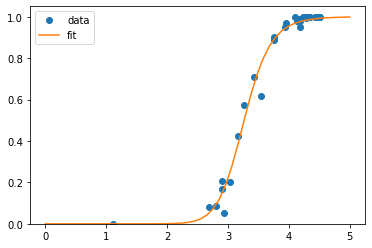

In [88]:
# define the allosteric sigmoid equation
def allosteric_sigmoid(x, h, k_prime):
    y = x ** h / (k_prime + x ** h)
    return y
 
# fit the curve to your data
popt, pcov = curve_fit(allosteric_sigmoid, katharo['log_deblur_reads'], katharo['correct_assign'], method='dogbox')
print(popt)
# plot fit curve
x = np.linspace(0, 5, 50)
y = allosteric_sigmoid(x, *popt)

# plot the fit
pylab.plot(katharo['log_deblur_reads'], katharo['correct_assign'], 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [89]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.5 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_50 = np.power(10, min_log_reads).astype(int)
min_freq_50

1836

In [90]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.8 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_80 = np.power(10, min_log_reads).astype(int)
min_freq_80

3797

In [91]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.9 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_90 = np.power(10, min_log_reads).astype(int)
min_freq_90

5997

In [92]:
# assign variables and solve for X (number of reads to pass filter)
h = popt[0]  # first value printed above graph
k = popt[1]   # second value printed above graph
y = 0.95 ## what you want to solve for

min_log_reads = np.power((k/(1/y-1)),(1/h))
min_freq_95 = np.power(10, min_log_reads).astype(int)
min_freq_95

9345

## Remove samples with less than Katharoseq read limit

In [93]:
KS_table_50 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_50)
df_50 = KS_table_50.filtered_table.view(pd.DataFrame)

In [94]:
KS_table_80 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_80)
df_80 = KS_table_80.filtered_table.view(pd.DataFrame)

In [95]:
KS_table_90 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_90)
df_90 = KS_table_90.filtered_table.view(pd.DataFrame)

In [96]:
KS_table_95 = feature_table.methods.filter_samples(table = table,
                             min_frequency = min_freq_95)
df_95 = KS_table_95.filtered_table.view(pd.DataFrame)

In [97]:
# import collapsed table as pandas dataframe
print("full dataset", len(df), "\n",
      "50%", len(df_50), len(df_50)/len(df),"%", "\n",
      "80%", len(df_80), len(df_80)/len(df),"%", "\n",
      "90%", len(df_90), len(df_90)/len(df),"%", "\n",
      "95%", len(df_95), len(df_95)/len(df),"%")

full dataset 96 
 50% 69 0.71875 % 
 80% 62 0.6458333333333334 % 
 90% 57 0.59375 % 
 95% 40 0.4166666666666667 %


### Filter datasets based on 50% threshold read counts

In [ ]:
# MagMAX 2-min. (low = 637, high = 362)
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_2min_covid.qza \
  --p-min-frequency 637 \
  --o-filtered-table extraction_test_round_3_biom_2min_covid_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_2min_covid_lod.qza \
  --o-visualization extraction_test_round_3_biom_2min_covid_lod.qzv


qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_2min_low.qza \
  --p-min-frequency 637 \
  --o-filtered-table extraction_test_round_3_biom_2min_low_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_2min_low_lod.qza \
  --o-visualization extraction_test_round_3_biom_2min_low_lod.qzv


qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_2min_high.qza \
  --p-min-frequency 362 \
  --o-filtered-table extraction_test_round_3_biom_2min_high_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_2min_high_lod.qza \
  --o-visualization extraction_test_round_3_biom_2min_high_lod.qzv


# MagMAX 20-min. (low = 491, high = 8499)
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_20min_covid.qza \
  --p-min-frequency 491 \
  --o-filtered-table extraction_test_round_3_biom_20min_covid_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_20min_covid_lod.qza \
  --o-visualization extraction_test_round_3_biom_20min_covid_lod.qzv


qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_20min_low.qza \
  --p-min-frequency 491 \
  --o-filtered-table extraction_test_round_3_biom_20min_low_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_20min_low_lod.qza \
  --o-visualization extraction_test_round_3_biom_20min_low_lod.qzv


qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_20min_high.qza \
  --p-min-frequency 8499 \
  --o-filtered-table extraction_test_round_3_biom_20min_high_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_20min_high_lod.qza \
  --o-visualization extraction_test_round_3_biom_20min_high_lod.qzv


# PowerSoil (low = 1836, high = 1050)
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_qiagen_covid.qza \
  --p-min-frequency 1836 \
  --o-filtered-table extraction_test_round_3_biom_qiagen_covid_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_qiagen_covid_lod.qza \
  --o-visualization extraction_test_round_3_biom_qiagen_covid_lod.qzv


qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_qiagen_low.qza \
  --p-min-frequency 1836 \
  --o-filtered-table extraction_test_round_3_biom_qiagen_low_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_qiagen_low_lod.qza \
  --o-visualization extraction_test_round_3_biom_qiagen_low_lod.qzv


qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_qiagen_high.qza \
  --p-min-frequency 1050 \
  --o-filtered-table extraction_test_round_3_biom_qiagen_high_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_qiagen_high_lod.qza \
  --o-visualization extraction_test_round_3_biom_qiagen_high_lod.qzv



## Merge LOD tables

In [ ]:
qiime feature-table merge \
  --i-tables extraction_test_round_3_biom_2min_covid_lod.qza \
  --i-tables extraction_test_round_3_biom_2min_low_lod.qza \
  --i-tables extraction_test_round_3_biom_2min_high_lod.qza \
  --i-tables extraction_test_round_3_biom_20min_covid_lod.qza \
  --i-tables extraction_test_round_3_biom_20min_low_lod.qza \
  --i-tables extraction_test_round_3_biom_20min_high_lod.qza \
  --i-tables extraction_test_round_3_biom_qiagen_covid_lod.qza \
  --i-tables extraction_test_round_3_biom_qiagen_low_lod.qza \
  --i-tables extraction_test_round_3_biom_qiagen_high_lod.qza \
  --o-merged-table extraction_test_round_3_biom_lod.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_lod.qza \
  --o-visualization extraction_test_round_3_biom_lod.qzv


## Filter to include only low biomass samples

In [ ]:
qiime feature-table filter-samples \
  --i-table extraction_test_round_3_biom_lod.qza \
  --m-metadata-file ../metadata/metadata_12201_round3_qiitaIDs_2020.08.12_qiime2.txt \
  --p-where "biomass_plate = 'low'" \
  --o-filtered-table extraction_test_round_3_biom_lod_low.qza

qiime feature-table summarize \
  --i-table extraction_test_round_3_biom_lod_low.qza \
  --o-visualization extraction_test_round_3_biom_lod_low.qzv
